In [20]:
import pandas as pd
import Picklez
import quandl
quandl.ApiConfig.api_key = Picklez.load_obj('quandleAPIKey')
data = quandl.get_table('WIKI/PRICES', date = { 'gte': '2017-01-01', 'lte': '2017-12-31' },paginate=True)

data.head(10)

quandleAPIKey remembered!


,ticker,date,open,high,low,close,volume,ex-dividend,split_ratio,adj_open,adj_high,adj_low,adj_close,adj_volume
None,,,,,,,,,,,,,,
0,A,2017-01-03,45.93,46.750,45.7400,46.49,1739726.0,0.0,1.0,45.620162,46.434630,45.431444,46.176384,1739726.0
1,A,2017-01-04,46.93,47.380,46.8162,47.10,1821264.0,0.0,1.0,46.613416,47.060380,46.500384,46.782269,1821264.0
2,A,2017-01-05,47.05,47.070,46.3550,46.54,1503763.0,0.0,1.0,46.732607,46.752472,46.042295,46.226047,1503763.0
3,A,2017-01-06,46.63,48.070,46.5600,47.99,2883483.0,0.0,1.0,46.315440,47.745726,46.245912,47.666265,2883483.0
4,A,2017-01-09,48.01,48.555,47.9050,48.14,2575328.0,0.0,1.0,47.686131,48.227454,47.581839,47.815254,2575328.0
5,A,2017-01-10,48.34,48.540,47.8200,48.10,1560549.0,0.0,1.0,48.013904,48.212555,47.497412,47.775523,1560549.0
6,A,2017-01-11,48.03,49.480,47.9500,49.25,5624332.0,0.0,1.0,47.705996,49.146214,47.626535,48.917766,5624332.0
7,A,2017-01-12,48.90,48.900,47.9800,48.52,3276952.0,0.0,1.0,48.570127,48.570127,47.656333,48.192690,3276952.0
8,A,2017-01-13,48.60,48.850,48.4100,48.69,1568923.0,0.0,1.0,48.272150,48.520464,48.083432,48.361543,1568923.0


In [22]:
Picklez.save_obj(data,'quandlData2017')

In [27]:
qdf = data
qdf['date'] = qdf['date'].apply(lambda x: pd.to_datetime(x))
qdf = qdf.set_index('date')
qdf.head(10)

,ticker,open,high,low,close,volume,ex-dividend,split_ratio,adj_open,adj_high,adj_low,adj_close,adj_volume
date,,,,,,,,,,,,,
2017-01-03,A,45.93,46.750,45.7400,46.49,1739726.0,0.0,1.0,45.620162,46.434630,45.431444,46.176384,1739726.0
2017-01-04,A,46.93,47.380,46.8162,47.10,1821264.0,0.0,1.0,46.613416,47.060380,46.500384,46.782269,1821264.0
2017-01-05,A,47.05,47.070,46.3550,46.54,1503763.0,0.0,1.0,46.732607,46.752472,46.042295,46.226047,1503763.0
2017-01-06,A,46.63,48.070,46.5600,47.99,2883483.0,0.0,1.0,46.315440,47.745726,46.245912,47.666265,2883483.0
2017-01-09,A,48.01,48.555,47.9050,48.14,2575328.0,0.0,1.0,47.686131,48.227454,47.581839,47.815254,2575328.0
2017-01-10,A,48.34,48.540,47.8200,48.10,1560549.0,0.0,1.0,48.013904,48.212555,47.497412,47.775523,1560549.0
2017-01-11,A,48.03,49.480,47.9500,49.25,5624332.0,0.0,1.0,47.705996,49.146214,47.626535,48.917766,5624332.0
2017-01-12,A,48.90,48.900,47.9800,48.52,3276952.0,0.0,1.0,48.570127,48.570127,47.656333,48.192690,3276952.0
2017-01-13,A,48.60,48.850,48.4100,48.69,1568923.0,0.0,1.0,48.272150,48.520464,48.083432,48.361543,1568923.0


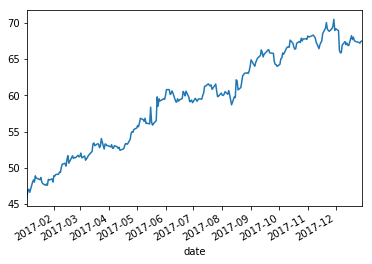

In [32]:
%matplotlib inline
qdf[qdf['ticker']=='A']['open'].plot()

In [33]:
qdf.keys()

Index([u'ticker', u'open', u'high', u'low', u'close', u'volume',
       u'ex-dividend', u'split_ratio', u'adj_open', u'adj_high', u'adj_low',
       u'adj_close', u'adj_volume'],
      dtype='object')

In [34]:
qdf['ticker'].unique()

array([u'A', u'AA', u'AAL', ..., u'ZOES', u'ZTS', u'ZUMZ'], dtype=object)

In [59]:
from bokeh.layouts import gridplot
from bokeh.plotting import figure, show, output_file
from bokeh.embed import components
from bokeh.io import output_notebook
from bokeh.palettes import Category10

output_notebook()

def generate_bokeh_plot(qdf,tickers,data_types):
    p1 = figure(title="WIKI/PRICES", toolbar_location="right",background_fill_color="#E8DDCB", x_axis_type="datetime",
                logo=None, tools="pan,wheel_zoom,box_zoom,reset,save")

    for m, ticker in enumerate(tickers):
        for n, data_type in enumerate(data_types):
            idxs=qdf['ticker']==ticker
            p1.line(qdf.index[idxs],  qdf[idxs][data_type], 
                    color=Category10[10][n], line_width=2, alpha=0.7, 
                    legend=ticker+':'+data_type)    

    p1.legend.location = "top_left"
    p1.legend.background_fill_color = "darkgrey"
    p1.xaxis.axis_label = 'time'
    p1.yaxis.axis_label = ''
    
    return p1
    
p = generate_bokeh_plot(qdf,['A','Z'],['open','close','high','low'])

show(p)

Loading BokehJS ...